In [1]:
# 对于线性回归来说，主要的问题是对异常值太敏感，但是在现实当中，异常值经常出现
# 异常值通常会使线性回归的效果大打折扣
# 所以可以使用岭回归来消除削弱异常值的影响

# 准备一些数据

lines = [
    '1,1.1',
    '1.1,1.02',
    '1.15,1.3',
    '1.4,1.4',
    '1.45,1.5',
    '1.6,1.45',
    '1.7,1.7',
    '1.8,1.9',
    '2.1,2.0',
    '2.21,2.2',
    '2.5,2.6',
    '2.7,2.8',
    '2.77,2.76',
    '2.78,2.99',
    '3.1,3.11',
    '3.22,3.5',
    '3.33,3.3',
    '3.36,3.4',
    '3.6,3.9',
    '4.1,4.2',
    '4.3,4.4',
    '4.6,4.7',
    '4.65,4.66',
    '4.67,4.9',
    '5.1,4.99',
    '5.3,5.01',
    '5.41,5.5',
    '5.5,5.5',
    '5.6,5.66',
    '5.7,5.8',
    '5.9,6.0'
]

lines_with_outliers = [
    '1,1.1',
    '1.1,1.02',
    '1.15,1.3',
    '1.4,1.4',
    '1.45,1.5',
    '1.6,1.45',
    '1.7,1.7',
    '1.8,1.9',
    '2.1,2.0',
    '2.21,2.2',
    '2.5,2.6',
    '2.7,2.8',
    '2.77,2.76',
    '2.78,2.99',
    '3.1,3.11',
    '3.22,3.5',
    '3.33,3.3',
    '3.36,3.4',
    '3.39,8.3',
    '3.6,3.9',
    '4.1,4.2',
    '4.3,4.4',
    '4.6,4.7',
    '4.63,9.1',
    '4.64,9.8',
    '4.65,4.66',
    '4.67,4.9',
    '5.1,4.99',
    '5.3,5.01',
    '5.41,5.5',
    '5.5,5.5',
    '5.6,5.66',
    '5.7,5.8',
    '5.9,6.0'
]

In [2]:
import matplotlib.pyplot as plt

def draw_figure(linregr, X_train, y_train):
    y_train_pred = linregr.predict(X_train)
    plt.figure()
    plt.scatter(X_train, y_train, color='green')
    plt.plot(X_train, y_train_pred, color='black', linewidth=4)
    plt.title('Training data')
    plt.show()

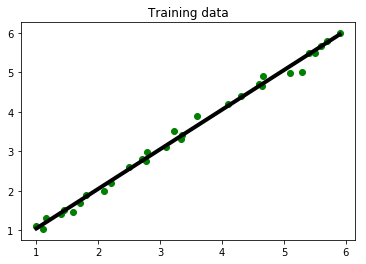

In [3]:
# 先创建一个线性回归, 不包含异常值

from sklearn import linear_model
import numpy as np

X1 = []
y1 = []

for line in lines:
    xt, yt = [float(i) for i in line.split(',')]
    X1.append(xt)
    y1.append(yt)

X1_train = np.array(X1).reshape((-1, 1))
y1_train = np.array(y1)

linregr1 = linear_model.LinearRegression()
linregr1.fit(X1_train, y1_train)

draw_figure(linregr1, X1_train, y1_train)

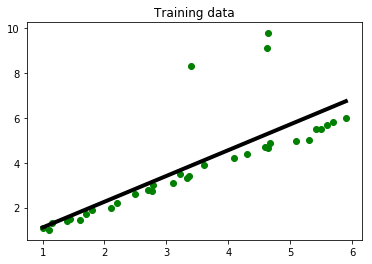

In [4]:
X2 = []
y2 = []

for line in lines_with_outliers:
    xt, yt = [float(d) for d in line.split(',')]
    X2.append(xt)
    y2.append(yt)

X2_train = np.array(X2).reshape((-1, 1))
y2_train = np.array(y2)

linregr2 = linear_model.LinearRegression()
linregr2.fit(X2_train, y2_train)

draw_figure(linregr2, X2_train, y2_train)

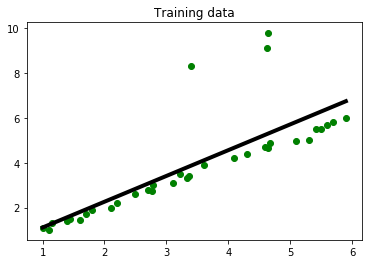

In [6]:
# 创建岭回归器

ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
ridge_regressor.fit(X2_train, y2_train)

draw_figure(ridge_regressor, X2_train, y2_train)